In [16]:
!pip install missingno

In [51]:
import numpy as np
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import plotly.express as plx

## Data Exploration

In [3]:
df = pd.read_csv("GHSH_Pooled_Data1.csv")

df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [23]:
print("Shape of the dataframe", df.shape)

Shape of the dataframe (106, 17)


In [6]:
df.describe()

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,104.000000,106.000000,102.000000,106.000000,106.000000,106.000000
mean,2014.698113,31.815094,22.496226,23.694340,7.642453,33.190566,29.996226,26.679245,15.546154,32.448113,31.109804,43.723679,7.744340,14.452830
std,2.089292,53.454089,16.553129,15.764075,8.713536,11.559408,10.786728,17.401318,10.748501,15.297701,14.185479,14.808421,4.365254,9.273621
min,2010.000000,1.400000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,11.550000,9.000000,11.400000,2.025000,25.825000,22.450000,12.600000,7.050000,20.750000,21.775000,34.800000,4.500000,9.400000
50%,2015.000000,26.000000,19.650000,21.800000,4.350000,33.400000,28.950000,22.350000,12.600000,29.650000,27.550000,41.400000,6.950000,11.850000
75%,2016.000000,42.350000,30.475000,31.850000,9.575000,40.850000,36.825000,37.100000,22.000000,42.700000,41.150000,53.150000,9.700000,18.425000
max,2018.000000,548.000000,80.200000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


## Show Unique Values for Specific Columns

In [43]:
def unique_values(columns):
    for col in columns:
        print("\n Unique Values for {} column".format(col))
        val = df[col].unique()
        print(sorted(val))
        print("Total values:", str(len(val)))
        print("="*100)

In [45]:
unique_values(["Country", "Year", "Age Group", "Sex"])


 Unique Values for Country column
['Argentina', 'Benin', 'Bhutan', 'Brunei Darussalam ', 'Dominican Republic ', 'Fiji Islands', 'Indonesia', 'Jamaica', 'Kiribati', 'Laos', 'Malaysia', 'Mauritus', 'Mongolia', 'Namibia', 'Nepal', 'Peru', 'Samoa', 'Seychelles', 'Suriname', 'Thailand', 'Timor-Leste ', 'Trinidad and Tobago ', 'Tuvalu ', 'Uruguay ', 'Vanuatu ', 'Wallis and Futuna ']
Total values: 26

 Unique Values for Year column
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Total values: 8

 Unique Values for Age Group column
['13-15', '16-17']
Total values: 2

 Unique Values for Sex column
['Female', 'Male']
Total values: 2


From this, we have:
- 26 COUNTRIES
- 8 Years from 2010-2017
- Age group: 13-15 | 16-17

### Check missing data

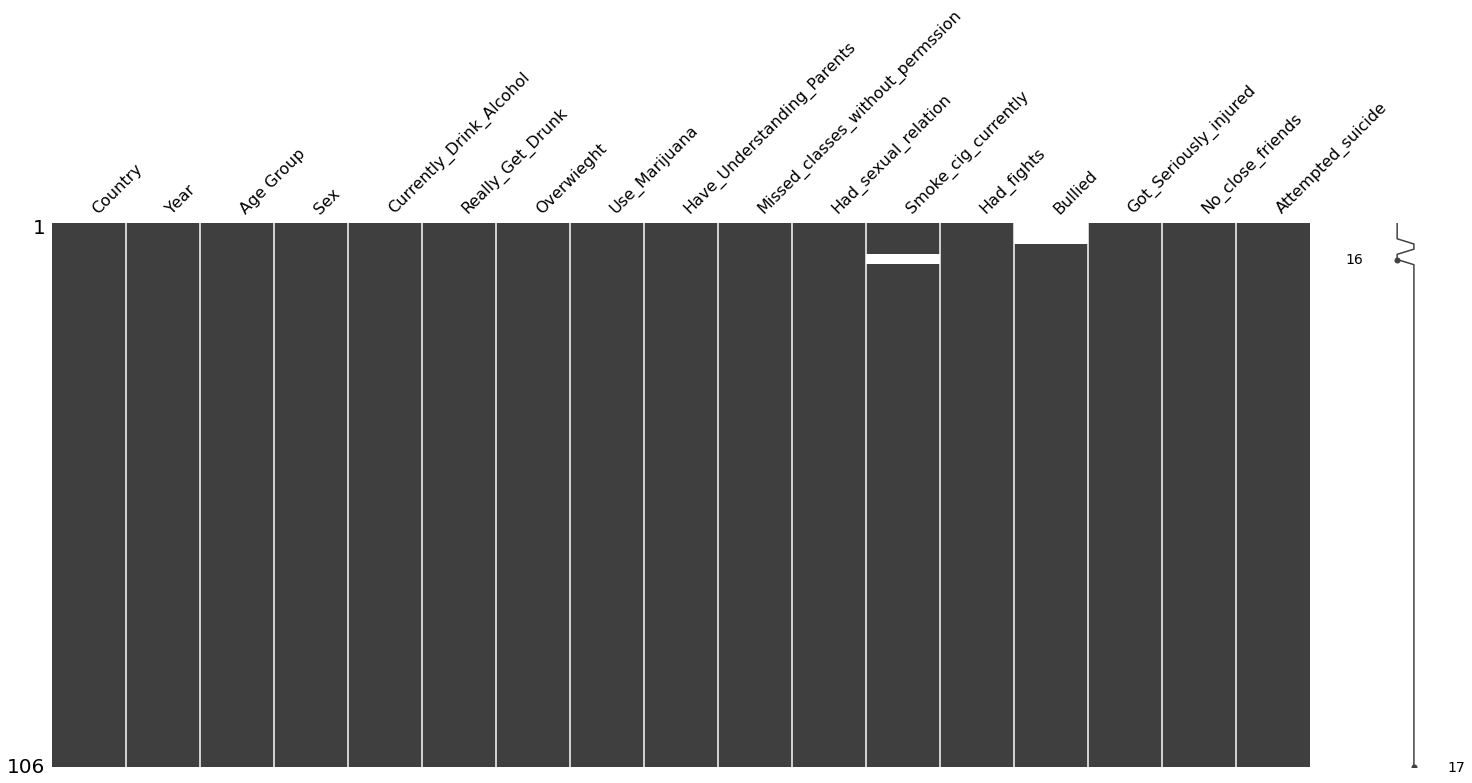

In [19]:
missingno.matrix(df)
plt.show()

In [24]:
print("Total missing data:",df.isnull().sum().sum())

Total missing data: 6


Since there are few counts of missing data, it is okay to drop them

In [47]:
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 0
Had_fights                          0
Bullied                             0
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

In [29]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(100, 17)

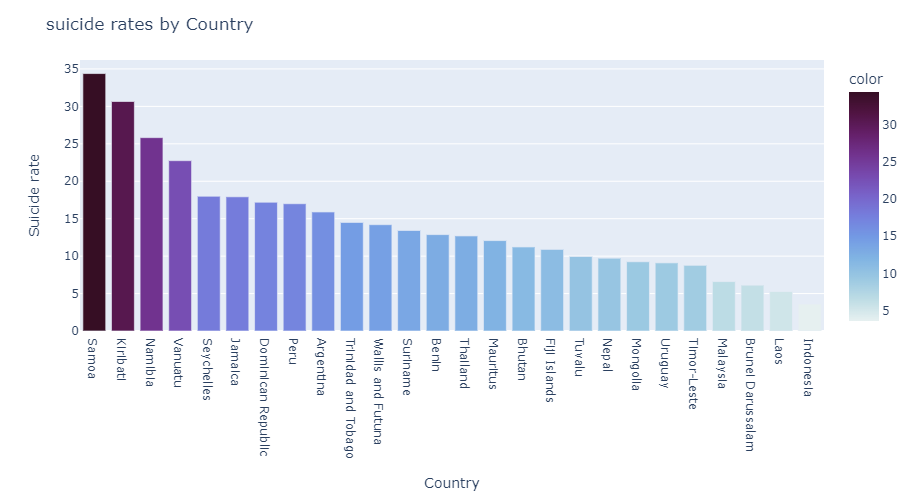

In [70]:
df_mean = df.groupby('Country')[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending=False)
fig_bar = plx.bar(x=df_mean.index, y=df_mean["Attempted_suicide"], color = df_mean.Attempted_suicide, color_continuous_scale='dense')
fig_bar.update_layout(width = 850, height = 500, title_text="suicide rates by Country")
fig_bar.update_xaxes(title = 'Country')
fig_bar.update_yaxes(title = 'Suicide rate')
fig_bar.show()